# PyTorch Tutorials - Complete Beginner Course

- https://www.youtube.com/watch?v=EMXfZB8FVUA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=1

By Python Engineer

## Pytorch Tutorial 01 - Installation

- https://pytorch.org/;
- GPU support: install the cudatoolkit - development environemnt for creating high-performance GPU accelerated applications (need a NVIDIA GPU);
- ```conda activate base/pytorch```

In [3]:
import torch
x = torch.rand(3) # create torch tensor
print(x)

tensor([0.3741, 0.0649, 0.1770])


In [5]:
torch.cuda.is_available() # does not support GPU :(

False

## Pytorch Tutorial 02 - Tensor Basics

- How to work with tensors and basic operations;
- Numpy - arrays and vectors;
- Pytorch - tensors;

In [10]:
import torch

x = torch.empty(1)
print(x) # print empty tensor

x = torch.empty(2)
print(x)

x = torch.empty(2, 3) # create empty tensor with multiple dimension
print(x)

x = torch.rand(2, 2) # random
print(x)

x = torch.zeros(3) # zeros
print(x)

x = torch.ones(3)
print(x)

tensor([19746.7188])
tensor([2.0357e+04, 3.0646e-41])
tensor([[2.0098e+04, 3.0646e-41, 2.0236e+04],
        [3.0646e-41, 8.9683e-44, 0.0000e+00]])
tensor([[0.1075, 0.0583],
        [0.9569, 0.8155]])
tensor([0., 0., 0.])
tensor([1., 1., 1.])


In [15]:
x = torch.ones(2, 2)
print(x.dtype) # torch.float32 is default value

x = torch.ones(2, 2, dtype=torch.double)
print(x.dtype)

x = torch.ones(2, 2, dtype=torch.int)
print(x.dtype) 

x = torch.ones(2, 2, dtype=torch.float16)
print(x.dtype)
print(x.size()) # print size

torch.float32
torch.float64
torch.int32
torch.float16
torch.Size([2, 2])


In [17]:
x = torch.tensor([2.5, 0.1, 4.2])
print(x)

tensor([2.5000, 0.1000, 4.2000])


In [18]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

print(x)
print(y)
z = x + y
print(z)
z = torch.add(z, z) # adding
print(z)

tensor([[0.0907, 0.1031],
        [0.0327, 0.3328]])
tensor([[0.5270, 0.4406],
        [0.9748, 0.2793]])
tensor([[0.6176, 0.5437],
        [1.0075, 0.6121]])
tensor([[1.2353, 1.0873],
        [2.0151, 1.2242]])


- In-place operation: operation that changes directly the content of a given Tensor without making a copy. In-place operations in pytorch are always postfixed with a ```_```, like ```.add_()```. Python operations like ```+=``` or ```*=``` are also inplace operations.

In [20]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

y.add_(x)
print(y)

z = x - y;
z = torch.sub(x, y) # torch.mul. y.mul_(x), torch.div(x, y)
print(z)

tensor([[1.3669, 1.4498],
        [0.4668, 0.2541]])
tensor([[-0.5121, -0.8404],
        [-0.4568, -0.0030]])


In [28]:
x = torch.rand(5, 3)
print(x)
print(x[:, 0]) # slicing
print(x[1, :])
print(x[0, 0])
print(x[0, 0].item())

tensor([[0.3222, 0.7806, 0.6722],
        [0.9685, 0.2158, 0.0512],
        [0.3598, 0.1178, 0.4182],
        [0.0697, 0.2236, 0.5201],
        [0.5012, 0.8890, 0.9663]])
tensor([0.3222, 0.9685, 0.3598, 0.0697, 0.5012])
tensor([0.9685, 0.2158, 0.0512])
tensor(0.3222)
0.3221678137779236


In [34]:
y = x.view(15)
print(y)
print(y.size())

z = x.view(-1, 5) # reshaping
print(z)
print(z.size())

tensor([0.3222, 0.7806, 0.6722, 0.9685, 0.2158, 0.0512, 0.3598, 0.1178, 0.4182,
        0.0697, 0.2236, 0.5201, 0.5012, 0.8890, 0.9663])
torch.Size([15])
tensor([[0.3222, 0.7806, 0.6722, 0.9685, 0.2158],
        [0.0512, 0.3598, 0.1178, 0.4182, 0.0697],
        [0.2236, 0.5201, 0.5012, 0.8890, 0.9663]])
torch.Size([3, 5])


In [35]:
import numpy as np

a = torch.ones(5) # tensor to a numpy array
print(a)
b = a.numpy()
print(type(b))

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>


In [36]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [40]:
if torch.cuda.is_available(): # create a tensor and put on GPU
    device = torch.device("cuda")
    x = torch.ones(5, device=device)
    y = torch.ones(5)
    y = y.to(device)
    z = x + y # performed on GPU
    print(z)

In [41]:
# pytorch will need to calculate the gradient later in the optimization steps
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


## Pytorch Tutorial 03 - Gradient Calculation With Autograd

- ```autograd``` package in pytorch and how to calculate gradients with it (gradients are essential for our model optimization);

In [50]:
x = torch.randn(3, requires_grad=True)
print(x)

# 2 inputs in the node: x and 2
# node: +
# output: y
# forward -> calculate y
y = x + 2 # computational graph 
# with backpropagation we can calculate gradients
print(y)

z = y*y*2
z = z.mean() # necessary
print(z) # grad_fn=<MulBackward0>

z.backward() # dz/dx gradient of z with respect to x
print(x.grad) # grad- where gradients are stores

# detaisl about chain rule and jacobian

tensor([-0.3214,  0.2705, -1.5029], requires_grad=True)
tensor([1.6786, 2.2705, 0.4971], grad_fn=<AddBackward0>)
tensor(5.4801, grad_fn=<MeanBackward0>)
tensor([2.2381, 3.0274, 0.6627])


In [51]:
x.requires_grad_(False)
print(x)

tensor([-0.3214,  0.2705, -1.5029])


In [52]:
x = torch.randn(3, requires_grad=True)
print(x)

with torch.no_grad(): # stop gradient
    y = x +2
    print(y) 

tensor([ 1.1547, -0.7095, -1.2912], requires_grad=True)
tensor([3.1547, 1.2905, 0.7088])


In [54]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [60]:
'''
weights = torch.ones(4, requires_grad=True)

optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad()
'''

'\nweights = torch.ones(4, requires_grad=True)\n\noptimizer = torch.optim.SGD(weights, lr=0.01)\noptimizer.step()\noptimizer.zero_grad()\n'

## Pytorch Tutorial 04 - Backpropagation - Theory With Example

- Examples, concepts and how to calculate gradients with it;
- Chain rule: dz/dx = dz/dy . dy/dx
- Computational graph - compute local gradients;

1) Forward pass: compute loss;

2) Compute local gradients;

3) Backward pass: compute dLoss/dWeights using the chain rule;

In [62]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

#forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights, next forward and backwards

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Pytorch Tutorial 05 - Gradient Descent with Autograd and Backpropagation

- Concrete example on how to optimize our model with automatic gradient computation using PyTorch autograd package;

- Implementing linear regression:
    - 1) Prediction: manually;
    - 1) Gradients computation: manually;
    - 1) Loss computation: manually;
    - 1) Parameter updates: manually;

In [71]:
# logistic regression implementation
import numpy as np

# f = x * w
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0 # weights

# model prediction
def forward(x):
    return w * x

# loss = MSE (mean square error)
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE - 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 14

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    
    # loss
    l = loss(y, y_pred)
    
    # gradients
    dw = gradient(x, y, y_pred)
    
    # update weights (go in the negative direction of the training data)
    w -= learning_rate * dw
    
    # print information
    if epoch % 1 == 0:
        print(f'{epoch + 1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
1: w = 1.200, loss = 30.00000000
2: w = 1.680, loss = 4.79999924
3: w = 1.872, loss = 0.76800019
4: w = 1.949, loss = 0.12288000
5: w = 1.980, loss = 0.01966083
6: w = 1.992, loss = 0.00314574
7: w = 1.997, loss = 0.00050331
8: w = 1.999, loss = 0.00008053
9: w = 1.999, loss = 0.00001288
10: w = 2.000, loss = 0.00000206
11: w = 2.000, loss = 0.00000033
12: w = 2.000, loss = 0.00000005
13: w = 2.000, loss = 0.00000001
14: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


   - 
    - 2) Prediction: manually;
    - 2) Gradients computation: autograd;
    - 2) Loss computation: manually;
    - 2) Parameter updates: manually;

In [79]:
# logistic regression implementation
import torch

# f = x * w
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

 # weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE (mean square error)
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE - 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 80 # needs more iterations

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    
    # loss
    l = loss(y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dx
    
    # update weights (go in the negative direction of the training data)
    with torch.no_grad():
        w -= learning_rate * w.grad
        
    # zero gradients
    w.grad.zero_()
    
    # print information
    if epoch % 10 == 0: # every 10th step
        print(f'{epoch + 1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
1: w = 0.300, loss = 30.00000000
11: w = 1.665, loss = 1.16278565
21: w = 1.934, loss = 0.04506890
31: w = 1.987, loss = 0.00174685
41: w = 1.997, loss = 0.00006770
51: w = 1.999, loss = 0.00000262
61: w = 2.000, loss = 0.00000010
71: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


## Pytorch Tutorial 06 -  Training Pipeline: Model, Loss, and Optimizer

- 
    - 3) Prediction: manually;
    - 3) Gradients computation: autograd;
    - 3) Loss computation: PyTorch loss;
    - 3) Parameter updates: PyTorch optimizer;

In [80]:
# 1) Design model (input, output size, forward pass)
# 2) Contruct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights

import torch.nn as nn # use some functions from neural networks

# f = x * w
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

 # weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# gradient
# MSE - 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 80 # needs more iterations

# loss
# exactly what we implemented before, but now with torch.nn function
loss = nn.MSELoss() # mean root square
optimizer = torch.optim.SGD([w], lr=learning_rate) # stocastic gradient descent

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)
    
    # loss
    l = loss(y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dx
    
    # update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    # print information
    if epoch % 10 == 0: # every 10th step
        print(f'{epoch + 1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
1: w = 0.300, loss = 30.00000000
11: w = 1.665, loss = 1.16278565
21: w = 1.934, loss = 0.04506890
31: w = 1.987, loss = 0.00174685
41: w = 1.997, loss = 0.00006770
51: w = 1.999, loss = 0.00000262
61: w = 2.000, loss = 0.00000010
71: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


- 
    - 4) Prediction: pytorch model;
    - 4) Gradients computation: autograd;
    - 4) Loss computation: PyTorch loss;
    - 4) Parameter updates: PyTorch optimizer;


In [91]:
# f = x * w
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = x.shape
print(n_samples, n_features) # 4 1

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

# gradient
# MSE - 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 500 # needs more iterations

# loss
# exactly what we implemented before, but now with torch.nn function
loss = nn.MSELoss() # mean root square
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stocastic gradient descent

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)
    
    # loss
    l = loss(y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dx
    
    # update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    # print information
    if epoch % 40 == 0: # every 10th step
        [w, b] = model.parameters()
        print(f'{epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

4 1
Prediction before training: f(5) = 4.361
1: w = 1.152, loss = 10.74855423
41: w = 2.041, loss = 0.00248790
81: w = 2.037, loss = 0.00195354
121: w = 2.033, loss = 0.00153690
161: w = 2.029, loss = 0.00120913
201: w = 2.026, loss = 0.00095126
241: w = 2.023, loss = 0.00074839
281: w = 2.020, loss = 0.00058877
321: w = 2.018, loss = 0.00046321
361: w = 2.016, loss = 0.00036441
401: w = 2.014, loss = 0.00028669
441: w = 2.012, loss = 0.00022556
481: w = 2.011, loss = 0.00017745
Prediction before training: f(5) = 10.022


In [92]:
# f = x * w
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = x.shape
print(n_samples, n_features) # 4 1

input_size = n_features
output_size = n_features

# creating a pytorch model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

# gradient
# MSE - 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 500 # needs more iterations

# loss
# exactly what we implemented before, but now with torch.nn function
loss = nn.MSELoss() # mean root square
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stocastic gradient descent

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)
    
    # loss
    l = loss(y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dx
    
    # update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    # print information
    if epoch % 40 == 0: # every 10th step
        [w, b] = model.parameters()
        print(f'{epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

4 1
Prediction before training: f(5) = -1.914
1: w = -0.142, loss = 40.14307404
41: w = 1.628, loss = 0.19977194
81: w = 1.671, loss = 0.15715234
121: w = 1.708, loss = 0.12363625
161: w = 1.741, loss = 0.09726823
201: w = 1.770, loss = 0.07652378
241: w = 1.796, loss = 0.06020353
281: w = 1.819, loss = 0.04736383
321: w = 1.840, loss = 0.03726248
361: w = 1.858, loss = 0.02931543
401: w = 1.874, loss = 0.02306333
441: w = 1.888, loss = 0.01814459
481: w = 1.901, loss = 0.01427486
Prediction before training: f(5) = 9.807


## Pytorch Tutorial 07 - Linear Regression

- 1) Design model (input, output size, forward pass)
- 2) Contruct loss and optimizer
- 3) Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update weights

epoch: 100, loss = 563.8965
epoch: 200, loss = 342.5907
epoch: 300, loss = 333.0102
epoch: 400, loss = 332.5873
epoch: 500, loss = 332.5685
epoch: 600, loss = 332.5676
epoch: 700, loss = 332.5675
epoch: 800, loss = 332.5675
epoch: 900, loss = 332.5676
epoch: 1000, loss = 332.5676


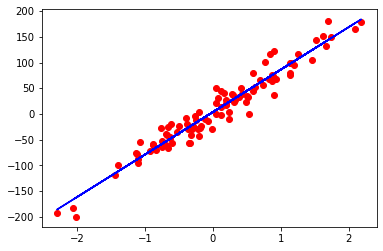

In [97]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# make one column vector
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
        
# plot 
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy,'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

## Pytorch Tutorial 08 - Logistic Regression

- 1) Design model (input, output size, forward pass)
- 2) Construct loss and optimizer
- 3) Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update weights
    
- Similar to Linear regression, just have to ajust the model and the loss function;

569 30
epoch: 100, loss = 0.2374
epoch: 200, loss = 0.1739
epoch: 300, loss = 0.1456
epoch: 400, loss = 0.1287
epoch: 500, loss = 0.1173
epoch: 600, loss = 0.1089
epoch: 700, loss = 0.1025
epoch: 800, loss = 0.0973
epoch: 900, loss = 0.0930
epoch: 1000, loss = 0.0894
accuracy = 0.9211


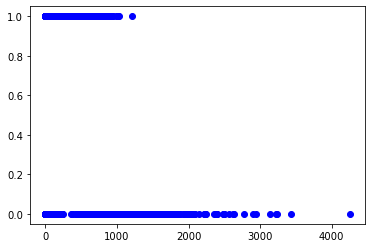

In [119]:
# binary classification dataset

from sklearn.preprocessing import StandardScaler # binary classification dataset
from sklearn.model_selection import train_test_split # split test / train

# 0) prepare data ---------------------------------------------------------------
# binary classification problem
# predict cancer based on input features
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)
# 569 samples and 30 different features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234) # test_size 20%

#scale 
sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test  = torch.from_numpy(y_test.astype(np.float32))

# reshape tensor
y_train = y_train.view(y_train.shape[0], 1)
y_test  = y_test.view(y_test.shape[0], 1)


# 1) model ----------------------------------------------------------------------
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

# 2) loss and optimizer ---------------------------------------------------------
learning_rate = 0.01
# BCE - binary cross entropy loss
criterion = nn.BCELoss()
# SGD - stocastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop --------------------------------------------------------------
num_epochs = 1000

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
        
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

plt.plot(X, y, 'bo')
plt.show()

## Pytorch Tutorial 09 - Dataset and DataLoader - Batch Training

- Pytorch dataset and data loader classes;
- Before, we loaded the dataset as below, from a csv file;
- And the trainig loop that looped over the number of epochs;
- And optimized our model based on the whole data set;
- This might be very time consuming if we do the calculation on this large data!

- We can devide the samples into smaller **batches**;

In [123]:
'''
# before - time consuming
data = np.loadtxt('wine.csv')

# training loop
for epoch in range(1000):
    x, y = data
    # forward + backward + weight updates
'''

"\n# before - time consuming\ndata = np.loadtxt('wine.csv')\n\n# training loop\nfor epoch in range(1000):\n    x, y = data\n    # forward + backward + weight updates\n"

In [124]:
'''
# after- optimized 

# training loop
for epoch in range(1000):
    # loop over all batches
    for i in range(total_batches):
        x_batch, y_batch = ...
        
# --> use DataSet and DataLoader to load wine.csv
'''

'\n# after- optimized \n\n# training loop\nfor epoch in range(1000):\n    # loop over all batches\n    for i in range(total_batches):\n        x_batch, y_batch = ...\n'

- **epoch** = 1 forward and backward pass of ALL training samples;
- **batch_size** = number of training samples in one forward and backward pass;
- **number of iterations** = number of passes, each pass using [batch_size] number of samples;
- e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch

In [132]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt('./data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

datatiter = iter(dataloader)
data = datatiter.next()
print(features, labels)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / 4)
print(total_samples, n_iterations) # 178 45

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward, update
        if (i + 1) % 5 == 0:
            print(f'epoch = {epoch + 1}/{num_epochs}, step = {i + 1}/{n_iterations}, inputs = {inputs.shape}')


tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
178 45
epoch = 1/2, step = 5/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 10/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 15/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 20/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 25/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 30/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 35/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 40/45, inputs = torch.Size([4, 13])
epoch = 1/2, step = 45/45, inputs = torch.Size([2, 13])
epoch = 2/2, step = 5/45, inputs = torch.Size([4, 13])
epoch = 2/2, step = 10/45, inputs = torch.Size(

## Pytorch Tutorial 10 - Dataset Transforms

- Transform: convert images or numpy arrays to tensors;
- Transforms can be applied to PIL images, tensors, ndarrays, or custom data during creation of the DataSet;
- **On images**: CenterCrop, Grayscale, Pad, RandomAffine, RandomCrop, RandomHorizontalFlip, RandomRotation, Resize, Scale;
- **On tensors**: LinearTransformation, Normalize, RandomErasing;
- **Conversion**:
    - ToPILImage: from tensor or ndarray;
    - ToTensor: from numpy.ndarray or PILImage;
- **Generic**: use lambda;
- **Custom**: write own class, compose multiple transforms;

In [ ]:
'''
Compose multiple transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
                               
torchvision.transforms.ReScale(256)
torchvision.transforms.ToTensor()
'''